In [1]:
#import needed libs
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

## load the data 

In [2]:
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

Note <br>
i used the numpy function as it wasn't any thing against using it 

### Define a function to standardize the dataset.

In [3]:
def standardize(M):
    from copy import deepcopy
    M = M.astype(float)
    standarized = deepcopy(M)
    
    for col in range(np.shape(M)[1]):
        col_m = np.mean(M[:, col])
        col_stddev = np.std(M[:, col])
        
        for row in range(np.shape(M)[0]):
            standarized[row,col] = (M[row,col] - col_m) / col_stddev
    return standarized

### Calculate covariance matrix using the formula: $C = \frac{X^TX}{n}$
##### This formula is used because the data has <b>zero</b> mean and <b>1</b> standard deviation.

In [4]:
#this function will standrize the matrix before using it 
def covariance(M):
    standardized = standardize(M)
    return ((standardized.T @ standardized) / np.shape(M)[0])
    

### Find eigen values and the corresponding eigen vectors for the covariance matrix

In [5]:
# values, vectors = np.linalg.eig(the output)

In [6]:
covariance(iris_data)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# making then into just one big function

In [7]:
def PCA(data,Percentage = 0.95):
    
    from copy import deepcopy
    
    data = data.astype(float)
    
    #creat a copy
    standarized = deepcopy(data)
    
    for col in range(np.shape(data)[1]):
        col_m = np.mean(data[:, col])
        col_stddev = np.std(data[:, col])
        
        for row in range(np.shape(data)[0]):
            standarized[row,col] = (data[row,col] - col_m) / col_stddev
    

    covariance_matrix  = ((standarized.T @ standarized) / np.shape(data)[0])
    
    
    #eigen values and the corresponding eigen vectors
    values, vectors = np.linalg.eig(covariance_matrix)
    
    #calc the weight of each componet 
    weights = []
    for i in range(len(values)):
        weights.append(values[i] / np.sum(values))
    
    #get most effective PCA
    i = 0
    sumweights = weights[i]
    
    while sumweights < 0.95:

        sumweights += weights[i+1]
        i += 1

    takenPCA = i+1
    
    projeced_points  = np.array([])
    for i in range(takenPCA):
        projeced_points = np.append(projeced_points, standarized.dot(vectors.T[i]),0)
        
    projeced_points  = projeced_points.reshape(takenPCA,data.shape[0])
    
    print(f"the PCA components taken are {takenPCA}")
    return projeced_points
    
    

In [8]:
final_PC = PCA(iris_data)

the PCA components taken are 2


### plot the data 
couldn't make into function but i will try in the future and it's not the current course requirements 

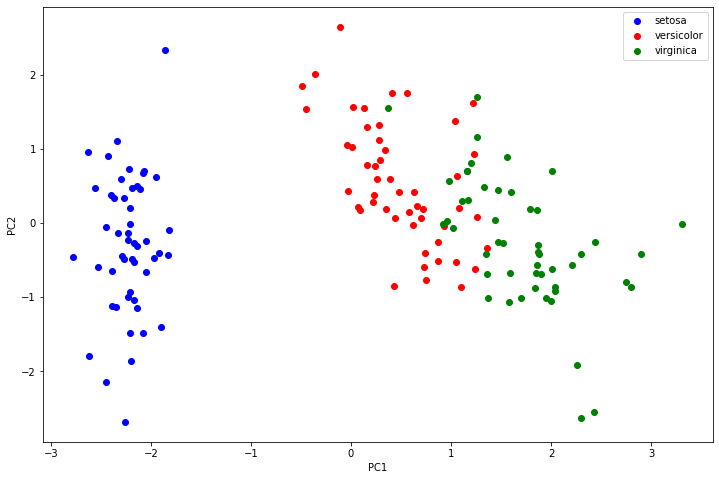

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
setosa = plt.scatter(final_PC[0][iris_target==0], final_PC[1][iris_target==0],  color="b")
versicolor = plt.scatter(final_PC[0][iris_target==1], final_PC[1][iris_target==1],  color="r")
virginica  = plt.scatter(final_PC[0][iris_target==2], final_PC[1][iris_target==2],  color='g')

plt.legend((setosa, versicolor, virginica),
           ('setosa', 'versicolor', 'virginica'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=10)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

i will be more than happy to hear any feedback about what i could have done better <3 